In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import scipy as sp
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms


In [2]:
df = pd.read_csv('../../Data/Ames_HousePrice.csv')

In [3]:
numeric = df.select_dtypes('number')
numeric.head(3)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,909176150,856,126000,30,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
1,2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
2,3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007


In [4]:
numeric.shape

(2580, 39)

In [5]:
Area = numeric[['LotArea','GrLivArea','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF1', 
                'BsmtFinSF2', 'WoodDeckSF','BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
               'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'PoolArea',
               'ScreenPorch', 'TotalBsmtSF']]
Area.head(3)

,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,BsmtUnfSF,EnclosedPorch,GarageArea,LotFrontage,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF
0,7890,856,856,0,0,0,238.0,0.0,0,618.0,0,399.0,NaN,0.0,0,0,166,856.0
1,4235,1049,1049,0,0,0,552.0,393.0,0,104.0,0,266.0,42.0,149.0,105,0,0,1049.0
2,6060,1001,1001,0,0,86,737.0,0.0,154,100.0,42,216.0,60.0,0.0,0,0,0,837.0


In [6]:
Price = numeric[['SalePrice']]
Price.shape

(2580, 1)

In [7]:
Price_Area = pd.concat([Price, Area], axis=1)
print(Price_Area.shape)
Price_Area.isnull().sum()

(2580, 19)


SalePrice          0
LotArea            0
GrLivArea          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
3SsnPorch          0
BsmtFinSF1         1
BsmtFinSF2         1
WoodDeckSF         0
BsmtUnfSF          1
EnclosedPorch      0
GarageArea         1
LotFrontage      462
MasVnrArea        14
OpenPorchSF        0
PoolArea           0
ScreenPorch        0
TotalBsmtSF        1
dtype: int64

In [8]:
No_Null = Price_Area.dropna()
print(No_Null.shape)
No_Null.isnull().sum()

(2107, 19)


SalePrice        0
LotArea          0
GrLivArea        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
3SsnPorch        0
BsmtFinSF1       0
BsmtFinSF2       0
WoodDeckSF       0
BsmtUnfSF        0
EnclosedPorch    0
GarageArea       0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
PoolArea         0
ScreenPorch      0
TotalBsmtSF      0
dtype: int64

In [9]:
from yellowbrick.regressor import CooksDistance

In [10]:
x = No_Null[['GrLivArea']]
#X = No_Null.drop('SalePrice', axis=1)
y = No_Null['SalePrice']

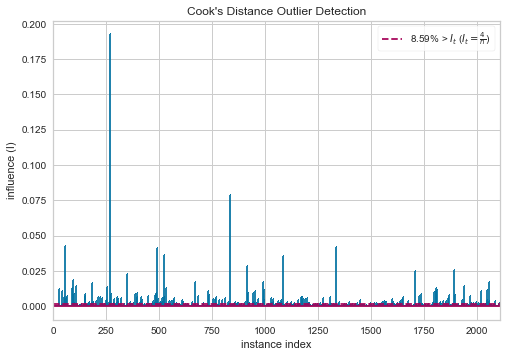

In [11]:
# Instantiate and fit the visualizer
visualizer = CooksDistance(draw_threshold=True)
visualizer.fit(x, y)
visualizer.show();

In [12]:
visualizer.influence_threshold_

0.0018984337921214998

In [13]:
visualizer.outlier_percentage_

8.590412909349785

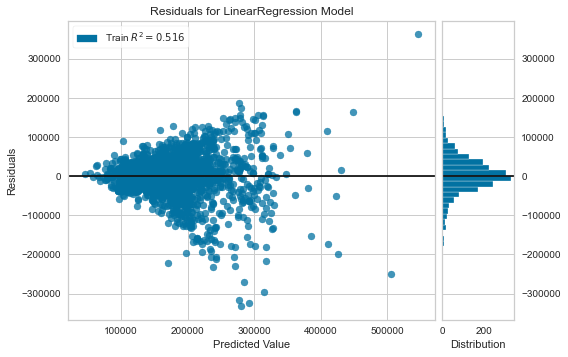

In [14]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

# Instantiate and fit the visualizer
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(x, y)
visualizer_residuals.show();

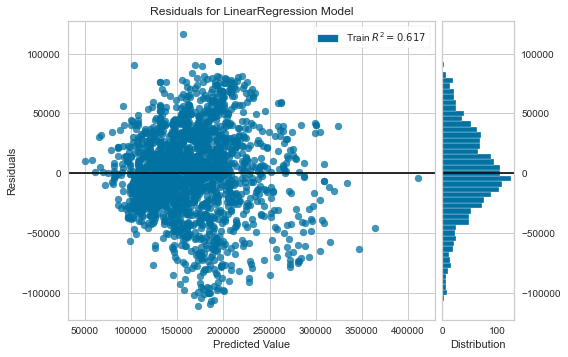

In [15]:
i_less_influential = (visualizer.distance_ <= visualizer.influence_threshold_)
X_li, y_li = x[i_less_influential], y[i_less_influential]

model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li, y_li)
visualizer_residuals.show();

In [16]:
Cook = No_Null[i_less_influential==False]
Cook.shape

(181, 19)

In [17]:
Cook.head(3)

,SalePrice,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,BsmtUnfSF,EnclosedPorch,GarageArea,LotFrontage,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF
29,450000,15431,2046,2046,0,0,0,1430.0,0.0,188,564.0,0,878.0,105.0,400.0,65,0,175,1994.0
50,150000,10890,2592,1296,1296,0,0,371.0,0.0,0,925.0,240,0.0,60.0,0.0,742,0,0,1296.0
56,395000,14226,1973,1973,0,0,0,0.0,0.0,315,1935.0,0,895.0,110.0,375.0,45,0,0,1935.0


In [18]:
i_less_influential==True

1        True
2        True
3        True
4        True
5        True
        ...  
2572     True
2573     True
2574     True
2577    False
2579     True
Length: 2107, dtype: bool

In [19]:
No_Null.shape

(2107, 19)

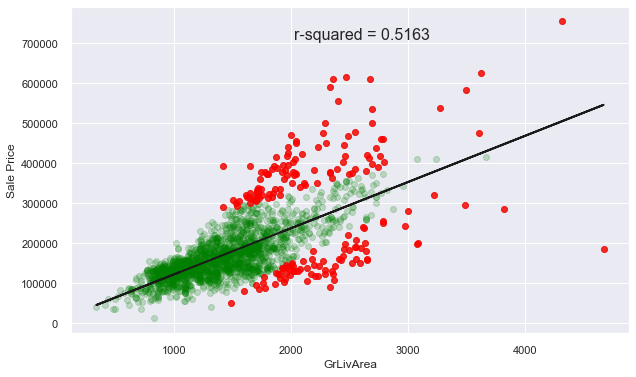

In [20]:
regressor = LinearRegression()

y = No_Null['SalePrice'].values.reshape(-1,1)
x = No_Null['GrLivArea'].values.reshape(-1,1)

yCook = Cook['SalePrice'].values.reshape(-1,1)
xCook = Cook['GrLivArea'].values.reshape(-1,1)


regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.2)
plt.scatter(xCook, yCook, c='red', alpha=0.8)
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show()

In [21]:
UnCook = No_Null[i_less_influential==True]
UnCook.shape

(1926, 19)

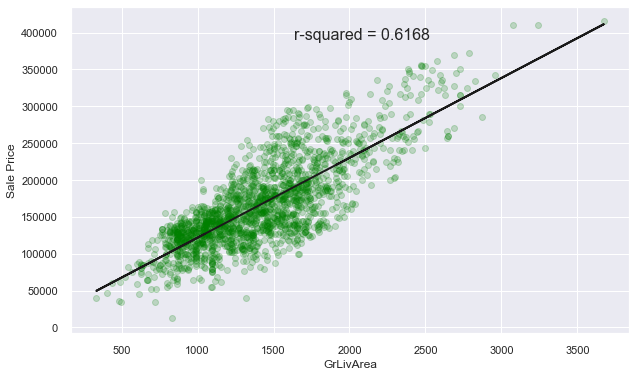

In [22]:
regressor = LinearRegression()

y = UnCook['SalePrice'].values.reshape(-1,1)
x = UnCook['GrLivArea'].values.reshape(-1,1)

regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.2)
#plt.scatter(xCook, yCook, c='red', alpha=0.8)
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show()

### Assumption Checks (No Transformation) ###

In [23]:
# Obtain and set x=input and y=output
x0 = UnCook[['GrLivArea']]
y0 = UnCook.SalePrice

In [24]:
#Setup statsmodels.api, inputs (x, x_constant, and y)
x_constant0 = sm.add_constant(x)

In [25]:
#Run OLS with statsmodels
lin_reg0 = sm.OLS(y,x_constant0).fit()
lin_reg0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     3097.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:02:02   Log-Likelihood:                -22934.
No. Observations:                1926   AIC:                         4.587e+04
Df Residuals:                    1924   BIC:                         4.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.34e+04   2848.500      4.703      0.000    7809.995     1.9e+04
x1           108.3160      1.946     55.650      0.000     104.499     112.133
==============================================================================
Omnibus:                       10.817   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.831
Skew:                           0.172   Prob(JB):                      0.00445
Kurtosis:                       3.127   Cond. No.                     5.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

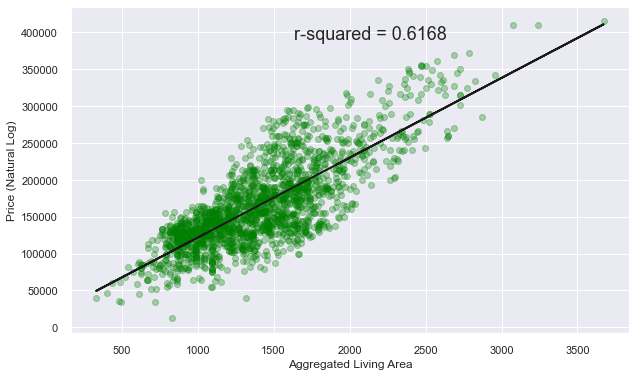

In [26]:
## Add fitted line to scatterplot
plt.plot(x0, lin_reg0.predict(), lw=2, c='k')

plt.scatter(x0, y0, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Price (Natural Log)')
plt.annotate("r-squared = {:.4f}".format(lin_reg0.rsquared), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=18)
plt.show()

In [27]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

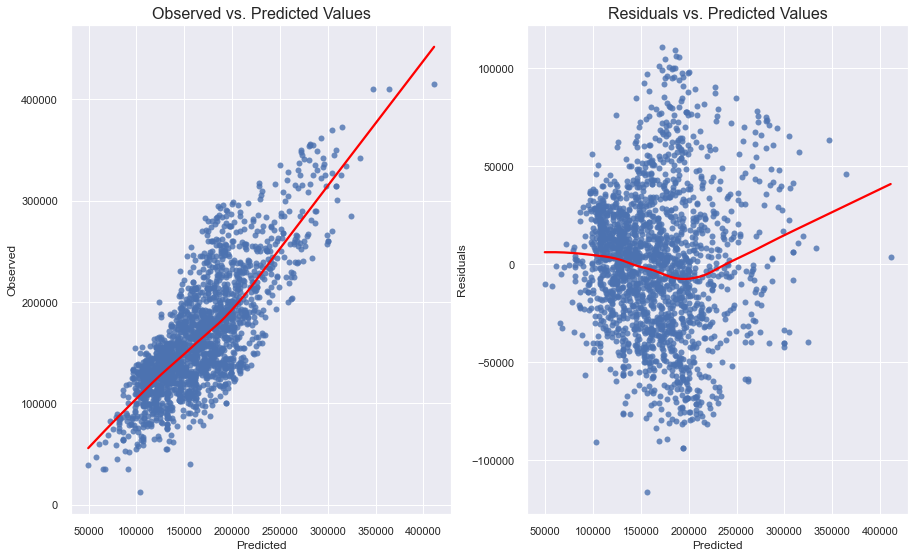

In [28]:
#Run Linearity Test for Assumption #1

import seaborn as sns 
import matplotlib.pyplot as plt

#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

linearity_test(lin_reg0, y)

In [29]:
#Check Assumption 2: Is expected (mean) value of residuals = 0? 
lin_reg0.resid.mean()

-1.4421960429858071e-10

In [30]:
#Check Assumption 3: Are errors independent? 
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg0.resid)

1.977510014729505

In [31]:
#Check Assumption 4: Normality of Residuals
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


Jarque-Bera test ---- statistic: 10.8307, p-value: 0.004447809711737527
Shapiro-Wilk test ---- statistic: 0.9947, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5057, p-value: 0.0000
Anderson-Darling test ---- statistic: 2.4641, 5% critical value: 0.7850
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


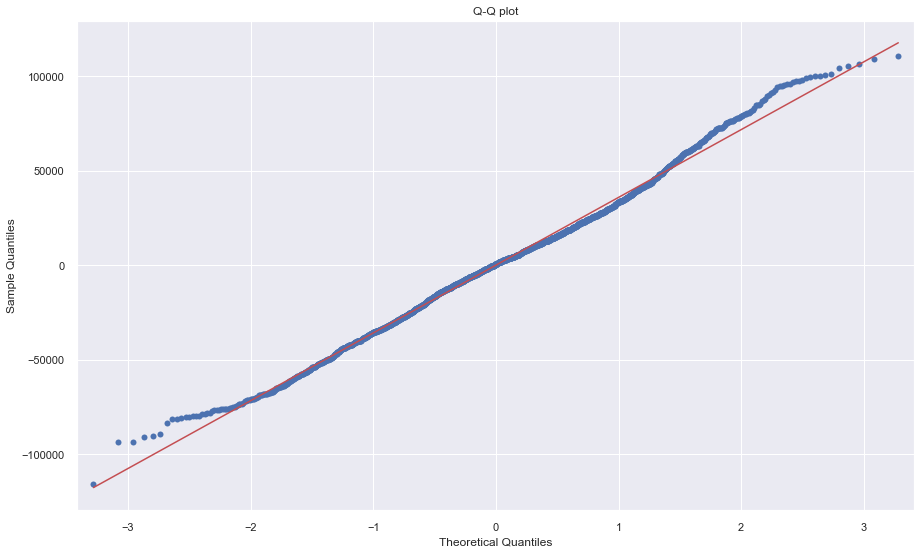

In [32]:
normality_of_residuals_test(lin_reg0)

### Train, Test ###

In [33]:
# Obtain and set x=input and y=output
x = UnCook[['GrLivArea']]
y = UnCook.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)


In [34]:
ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.619966
--------------------------------------------------
R^2 for test  set: 0.609548


In [35]:
ols.coef_

array([108.55455504])

In [36]:
ols.intercept_

12796.345092752861